In [1]:
import scipy.io 
import matplotlib.pyplot as plt 
import data 
import pickle 
import numpy as np 
import os
import pickle
import seaborn as sns
import torch
import pandas as pd
%matplotlib inline

device: cuda:3


In [2]:
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")


In [4]:
num_topics=10

In [5]:
input_dir = f'/home/yiyi/nlp_tm/models/DETM/k_{num_topics}'


In [6]:
modelpath = '/home/yiyi/nlp_tm/results/detm_twitter_K_10_Htheta_800_Optim_adam_Clip_0.0_ThetaAct_relu_Lr_0.005_Bsz_1000_RhoSize_300_L_3_minDF_10_trainEmbeddings_1_val_ppl_2757.5_epoch_3'

In [7]:
#modelpath= '/home/yiyi/nlp_tm/results/detm_twitter_K_5_Htheta_800_Optim_adam_Clip_0.0_ThetaAct_relu_Lr_0.005_Bsz_1000_RhoSize_300_L_3_minDF_10_trainEmbeddings_1_val_ppl_2938.2_epoch_1'

In [8]:
print('loading the model:', modelpath)
with open(modelpath, 'rb') as f:
    model=torch.load(f)

loading the model: /home/yiyi/nlp_tm/results/detm_twitter_K_10_Htheta_800_Optim_adam_Clip_0.0_ThetaAct_relu_Lr_0.005_Bsz_1000_RhoSize_300_L_3_minDF_10_trainEmbeddings_1_val_ppl_2757.5_epoch_3
device: cuda:3


In [9]:
model.to(device)

DETM(
  (t_drop): Dropout(p=0.0, inplace=False)
  (theta_act): ReLU()
  (rho): Linear(in_features=300, out_features=20865, bias=False)
  (q_theta): Sequential(
    (0): Linear(in_features=20875, out_features=800, bias=True)
    (1): ReLU()
    (2): Linear(in_features=800, out_features=800, bias=True)
    (3): ReLU()
  )
  (mu_q_theta): Linear(in_features=800, out_features=10, bias=True)
  (logsigma_q_theta): Linear(in_features=800, out_features=10, bias=True)
  (q_eta_map): Linear(in_features=20865, out_features=200, bias=True)
  (q_eta): LSTM(200, 200, num_layers=3)
  (mu_q_eta): Linear(in_features=210, out_features=10, bias=True)
  (logsigma_q_eta): Linear(in_features=210, out_features=10, bias=True)
)

In [10]:
model.eval()
with torch.no_grad():
    alpha = model.mu_q_alpha.to(device)

    beta = model.get_beta(alpha).cpu().numpy()
    

In [11]:
beta.shape

(10, 8, 20865)

In [12]:


with open('/home/yiyi/nlp_tm/preprocessed_data/timestamps.pkl', 'rb') as f:
    timelist = pickle.load(f)
print('timelist: ', timelist)
T = len(timelist)
ticks = [str(x) for x in timelist]
print('ticks: ', ticks)


timelist:  [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
ticks:  ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


In [13]:

## get vocab
with open('/home/yiyi/nlp_tm/preprocessed_data/vocab.pkl', 'rb') as f:
    vocab = pickle.load(f)    
vocab_size = len(vocab)


In [14]:
timelist

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [15]:
ticks

['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

Text(0.5, 1.0, 'Asylum Seeker')

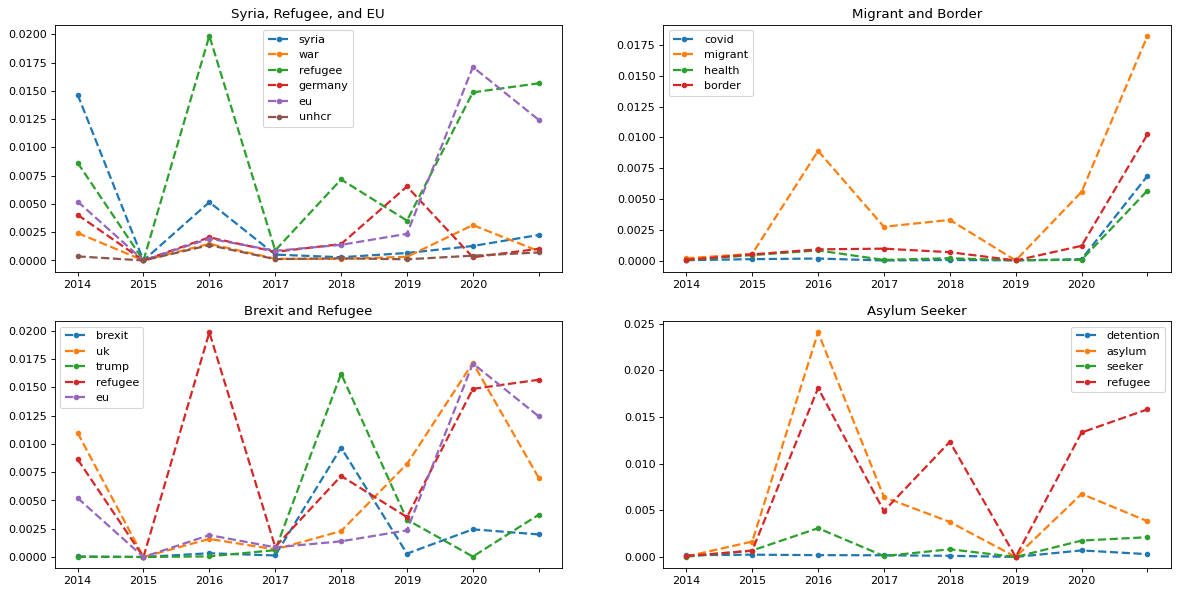

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 9), dpi=80, facecolor='w', edgecolor='k')
ax1, ax2, ax3, ax4 = axes.flatten()
ticks = [str(x) for x in timelist]


words_7 = ['syria', 'war', 'refugee', 'germany', 'eu', 'unhcr']
tokens_7 = [vocab.index(w) for w in words_7]
betas_7 = [beta[7, :, x] for x in tokens_7]

for i, prob in enumerate(betas_7):
    ax1.plot(prob, label=words_7[i], lw=2, linestyle='--', marker='o', markersize=4 )
ax1.legend()
ax1.set_xticklabels(ticks)
ax1.set_title('Syria, Refugee, and EU')

words_8 = ['covid', 'migrant', 'health', 'border']
tokens_8 = [vocab.index(w) for w in words_8]
betas_8 = [beta[8, :, x] for x in tokens_8]

for i, prob in enumerate(betas_8):
    ax2.plot(prob, label=words_8[i], lw=2, linestyle='--', marker='o', markersize=4 )
ax2.legend()
ax2.set_xticklabels(ticks)
ax2.set_title('Migrant and Border')



words_brexit = ['brexit', 'uk', 'trump', 'refugee', 'eu']
tokens_brexit = [vocab.index(w) for w in words_brexit]
betas_brexit = [beta[7, :, x] for x in tokens_brexit]

for i, prob in enumerate(betas_brexit):
    ax3.plot(prob, label=words_brexit[i], lw=2, linestyle='--', marker='o', markersize=4 )
ax3.legend()
ax3.set_xticklabels(ticks)
ax3.set_title('Brexit and Refugee')



words_global = [ 'detention', 'asylum', 'seeker', 'refugee']
tokens_global = [vocab.index(w) for w in words_global]
betas_global = [beta[8, :, x] for x in tokens_global]

for i, prob in enumerate(betas_global):
    ax4.plot(prob, label=words_global[i], lw=2, linestyle='--', marker='o', markersize=4 )
ax4.legend()
ax4.set_xticklabels(ticks)
ax4.set_title('Asylum Seeker')


In [41]:
fig.savefig(f'k_{num_topics}/evolution_words_k{num_topics}.png',bbox_inches='tight')

In [51]:
words_7 = ['syria', 'war', 'refugee', 'germany', 'eu']
tokens_7 = [vocab.index(w) for w in words_7]
betas_7 = [beta[7, :, x] for x in tokens_7]
betas_7
df_7 = pd.DataFrame()

In [58]:
T

8

In [59]:
for i, prob in enumerate(betas_7):
    ax1.plot(prob, label=words_7[i], lw=2, linestyle='--', marker='o', markersize=4 )
ax1.legend()
ax1.set_xticks(timelist)
ax1.set_xticklabels(ticks)

[Text(0.0, 0, '2013'),
 Text(0.2, 0, '2014'),
 Text(0.4, 0, '2015'),
 Text(0.6000000000000001, 0, '2016'),
 Text(0.8, 0, '2017'),
 Text(1.0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

In [61]:
words_8 = ['covid', 'migrant', 'crisis', 'unhcr']
tokens_8 = [vocab.index(w) for w in words_8]
betas_8 = [beta[8, :, x] for x in tokens_8]
betas_8


[array([2.49997684e-05, 1.10779532e-04, 1.59349525e-04, 2.31851254e-06,
        4.27760133e-05, 1.17969585e-05, 1.08607252e-04, 6.87231962e-03],
       dtype=float32),
 array([1.8202070e-04, 5.3685217e-04, 8.8998554e-03, 2.7379908e-03,
        3.2966421e-03, 5.4504931e-06, 5.5749989e-03, 1.8239312e-02],
       dtype=float32),
 array([1.3127511e-04, 3.6792841e-04, 4.0314854e-03, 8.8381022e-04,
        1.0420070e-03, 1.0509236e-05, 1.0693931e-03, 7.2462426e-04],
       dtype=float32),
 array([5.9092392e-05, 9.5292914e-04, 3.5938682e-04, 1.2396561e-04,
        5.1792333e-04, 9.2381051e-06, 3.7877230e-04, 2.6936640e-04],
       dtype=float32)]

In [62]:
for i, prob in enumerate(betas_8):
    ax2.plot(prob, label=words_8[i], lw=2, linestyle='--', marker='o', markersize=4 )
ax2.legend()
ax2.set_xticks(timelist)
ax2.set_xticklabels(ticks)

[Text(0.0, 0, '2013'),
 Text(0.2, 0, '2014'),
 Text(0.4, 0, '2015'),
 Text(0.6000000000000001, 0, '2016'),
 Text(0.8, 0, '2017'),
 Text(1.0, 0, '2018'),
 Text(0, 0, '2019'),
 Text(0, 0, '2020')]

In [63]:
plt.show()

In [33]:
betas_7

[array([1.4679715e-02, 1.8202005e-09, 5.1641022e-03, 5.2106829e-04,
        2.8528468e-04, 6.6511327e-04, 1.2822872e-03, 2.2571294e-03],
       dtype=float32),
 array([2.4356227e-03, 3.3878869e-09, 1.4732594e-03, 1.5274623e-04,
        1.3623314e-04, 3.2868635e-04, 3.1287938e-03, 8.2691864e-04],
       dtype=float32),
 array([8.6421464e-03, 3.5552442e-10, 1.9871099e-02, 8.9011603e-04,
        7.1683945e-03, 3.5294276e-03, 1.4871410e-02, 1.5675878e-02],
       dtype=float32),
 array([4.0407199e-03, 3.2300509e-09, 2.0479667e-03, 7.6461548e-04,
        1.4539411e-03, 6.5457202e-03, 2.8243769e-04, 1.0326788e-03],
       dtype=float32),
 array([1.9053508e-03, 2.5357350e-10, 4.3016602e-04, 8.1331214e-05,
        4.1616466e-05, 4.4444678e-03, 1.4390548e-04, 1.0371300e-03],
       dtype=float32)]

In [31]:
df_7['Word']= words_7

In [32]:
df_7 

,Word
0,syria
1,war
2,refugee
3,germany
4,europe
